In [1]:
from google.colab import files
uploaded = files.upload()

Saving NN_sample.ipynb to NN_sample.ipynb


In [2]:
from google.colab import files
uploaded = files.upload()

Saving planar_utils.py to planar_utils.py


In [3]:
from google.colab import files
uploaded = files.upload()

Saving testCases.py to testCases.py


In [4]:
import numpy as np

In [7]:
from google.colab import files
uploaded = files.upload()

Saving planar_utils.py to planar_utils (1).py


In [8]:
from google.colab import files
uploaded = files.upload()

Saving testCases.py to testCases (1).py


In [10]:
import planar_utils
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset

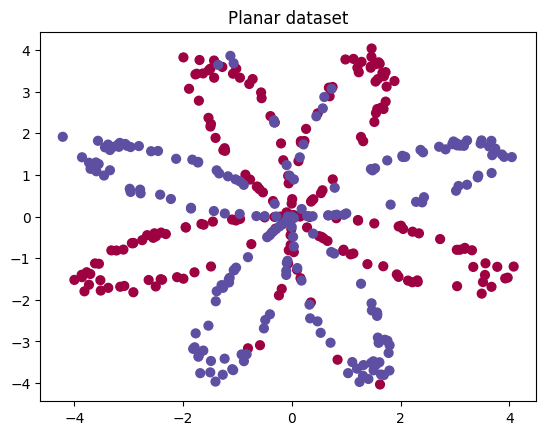

In [11]:
X, Y = load_planar_dataset()

import matplotlib.pyplot as plt
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral)
plt.title("Planar dataset")
plt.show()

In [12]:
import numpy as np

def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4   # default hidden units, you will change this later
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

def compute_cost(A2, Y, parameters):
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2)) / m
    cost = np.squeeze(cost)
    return cost

def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]

    W2 = parameters["W2"]

    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    return grads

def update_parameters(parameters, grads, learning_rate=1.2):
    parameters["W1"] -= learning_rate * grads["dW1"]
    parameters["b1"] -= learning_rate * grads["db1"]
    parameters["W2"] -= learning_rate * grads["dW2"]
    parameters["b2"] -= learning_rate * grads["db2"]
    return parameters

def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    np.random.seed(3)
    n_x = X.shape[0]
    n_y = Y.shape[0]

    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)

        cost = compute_cost(A2, Y, parameters)

        grads = backward_propagation(parameters, cache, X, Y)

        parameters = update_parameters(parameters, grads)

        if print_cost and i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost}")

    return parameters

def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    return predictions

In [13]:
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]

for n_h in hidden_layer_sizes:
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print(f"Accuracy for {n_h} hidden units: {accuracy} %")

/tmp/ipython-input-1015653038.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.5 %
Accuracy for 50 hidden units: 90.75 %
